In [1]:
import urllib.request

fuel_pin_url = 'https://tinyurl.com/y3ugwz6w' # 1.2 MB
teapot_url = 'https://tinyurl.com/y4mcmc3u' # 29 MB

def download(url):
    """
    Helper function for retrieving dagmc models
    """
    u = urllib.request.urlopen(url)

    if u.status != 200:
        raise RuntimeError("Failed to download file.")

    # save file as dagmc.h5m
    with open("dagmc.h5m", 'wb') as f:
        f.write(u.read())

In [2]:
%matplotlib inline
from IPython.display import Image
import openmc

In [3]:
# materials
u235 = openmc.Material(name="fuel")
u235.add_nuclide('U235', 1.0, 'ao')
u235.set_density('g/cc', 11)
u235.id = 40

water = openmc.Material(name="water")
water.add_nuclide('H1', 2.0, 'ao')
water.add_nuclide('O16', 1.0, 'ao')
water.set_density('g/cc', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
water.id = 41

mats = openmc.Materials([u235, water])
mats.export_to_xml()

In [15]:
print(mats)

[Material
	ID             =	40
	Name           =	fuel
	Temperature    =	None
	Density        =	11 [g/cc]
	S(a,b) Tables  
	Nuclides       
	U235           =	1.0          [ao]
, Material
	ID             =	41
	Name           =	water
	Temperature    =	None
	Density        =	1.0 [g/cc]
	S(a,b) Tables  
	S(a,b)         =	('c_H_in_H2O', 1.0)
	Nuclides       
	H1             =	2.0          [ao]
	O16            =	1.0          [ao]
]


In [ ]:
Image("./images/cylinder_mesh.png", width=350)

In [5]:
download(fuel_pin_url)

In [11]:
dag_universe = openmc.DAGMCUniverse(filename="dagmc.h5m")
geom = openmc.Geometry(root=dag_universe)
geom.export_to_xml()

In [18]:
settings = openmc.Settings()
settings.dagmc = True
settings.batches = 30
settings.inactive = 5
settings.particles = 5000
settings.export_to_xml()

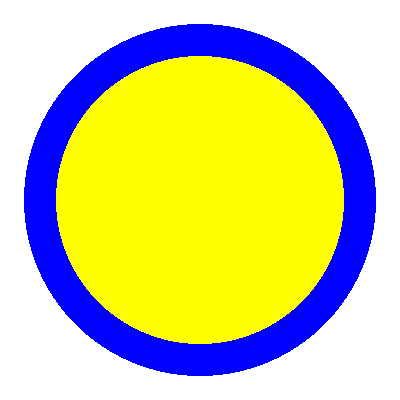

In [20]:
p = openmc.Plot()
p.width = (25.0, 25.0)
p.pixels = (400, 400)
p.color_by = 'material'
p.colors = {u235: 'yellow', water: 'blue'}
openmc.plot_inline(p)

In [8]:
settings.source = openmc.Source(space=openmc.stats.Box([-4., -4., -4.],
                                                       [ 4.,  4.,  4.]))
settings.export_to_xml()

In [9]:
tally = openmc.Tally()
tally.scores = ['total']
tally.filters = [openmc.CellFilter(1)]
tallies = openmc.Tallies([tally])
tallies.export_to_xml()

In [19]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################